In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection & Preparation

In [2]:
df = pd.read_csv('../Indian_Rainfall/rainfaLLIndia.csv')
df

,subdivision,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
0,ANDAMAN & NICOBAR ISLAND,1901,517.5,365.1,481.1,332.6,1696.3
1,ANDAMAN & NICOBAR ISLAND,1902,537.1,228.9,753.7,666.2,2185.9
2,ANDAMAN & NICOBAR ISLAND,1903,479.9,728.4,326.7,339.0,1874.0
3,ANDAMAN & NICOBAR ISLAND,1904,495.1,502.0,160.1,820.4,1977.6
4,ANDAMAN & NICOBAR ISLAND,1905,628.7,368.7,330.5,297.0,1624.9
...,...,...,...,...,...,...,...
4327,LAKSHDWEEP,2017,521.9,164.2,206.2,216.0,1108.3
4328,LAKSHDWEEP,2018,203.2,139.7,124.4,74.4,541.7
4329,LAKSHDWEEP,2019,242.5,489.4,338.4,156.7,1227.0
4330,LAKSHDWEEP,2020,265.4,476.2,269.6,334.3,1345.5


In [3]:
df = df.rename(columns={'JUN-SEP':'TOTAL'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subdivision  4332 non-null   object 
 1   YEAR         4332 non-null   int64  
 2   JUN          4332 non-null   float64
 3   JUL          4332 non-null   float64
 4   AUG          4332 non-null   float64
 5   SEP          4332 non-null   float64
 6   TOTAL        4332 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 237.0+ KB


In [5]:
df.shape

(4332, 7)

In [6]:
df.isnull().sum()

subdivision    0
YEAR           0
JUN            0
JUL            0
AUG            0
SEP            0
TOTAL          0
dtype: int64

In [7]:
df.dtypes

subdivision     object
YEAR             int64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
TOTAL          float64
dtype: object

In [8]:
df.subdivision.nunique()

36

In [9]:
df.subdivision.value_counts().head()

subdivision
WEST MADHYA PRADESH                  121
EAST RAJASTHAN                       121
COASTAL KARNATAKA                    121
TAMIL NADU, PUDUCHERRY & KARAIKAL    121
RAYALSEEMA                           121
Name: count, dtype: int64

In [10]:
## Removing Duplicates
df = df.drop_duplicates()

## Feature Engineering

In [11]:
# Average Rainfall
df['AVG_RAINFALL'] = df[['JUN', 'JUL', 'AUG', 'SEP']].mean(axis=1)
df.head()

,subdivision,YEAR,JUN,JUL,AUG,SEP,TOTAL,AVG_RAINFALL
0,ANDAMAN & NICOBAR ISLAND,1901,517.5,365.1,481.1,332.6,1696.3,424.075
1,ANDAMAN & NICOBAR ISLAND,1902,537.1,228.9,753.7,666.2,2185.9,546.475
2,ANDAMAN & NICOBAR ISLAND,1903,479.9,728.4,326.7,339.0,1874.0,468.500
3,ANDAMAN & NICOBAR ISLAND,1904,495.1,502.0,160.1,820.4,1977.6,494.400
4,ANDAMAN & NICOBAR ISLAND,1905,628.7,368.7,330.5,297.0,1624.9,406.225


In [12]:
target_year = 2021
month = 'JUN'

df_filtered = df[df['YEAR'] <= target_year]

avg_rainfall = df_filtered[month].mean()

print(f"Average rainfall in {month} from 1901 to {target_year}: {avg_rainfall:.2f} mm")

Average rainfall in JUN from 1901 to 2021: 227.58 mm


In [13]:
# Year-on-Year Change in rainfall (per subdivision)

df['YOY_CHANGE'] = df.groupby('subdivision')['TOTAL'].pct_change()
df.head()

,subdivision,YEAR,JUN,JUL,AUG,SEP,TOTAL,AVG_RAINFALL,YOY_CHANGE
0,ANDAMAN & NICOBAR ISLAND,1901,517.5,365.1,481.1,332.6,1696.3,424.075,NaN
1,ANDAMAN & NICOBAR ISLAND,1902,537.1,228.9,753.7,666.2,2185.9,546.475,0.288628
2,ANDAMAN & NICOBAR ISLAND,1903,479.9,728.4,326.7,339.0,1874.0,468.500,-0.142687
3,ANDAMAN & NICOBAR ISLAND,1904,495.1,502.0,160.1,820.4,1977.6,494.400,0.055283
4,ANDAMAN & NICOBAR ISLAND,1905,628.7,368.7,330.5,297.0,1624.9,406.225,-0.178347


In [14]:
# Lag (previous year's rainfall for each subdivision)

df['PREV_YEAR_RAINFALL'] = df.groupby('subdivision')['TOTAL'].shift(1)
df.head()

,subdivision,YEAR,JUN,JUL,AUG,SEP,TOTAL,AVG_RAINFALL,YOY_CHANGE,PREV_YEAR_RAINFALL
0,ANDAMAN & NICOBAR ISLAND,1901,517.5,365.1,481.1,332.6,1696.3,424.075,NaN,NaN
1,ANDAMAN & NICOBAR ISLAND,1902,537.1,228.9,753.7,666.2,2185.9,546.475,0.288628,1696.3
2,ANDAMAN & NICOBAR ISLAND,1903,479.9,728.4,326.7,339.0,1874.0,468.500,-0.142687,2185.9
3,ANDAMAN & NICOBAR ISLAND,1904,495.1,502.0,160.1,820.4,1977.6,494.400,0.055283,1874.0
4,ANDAMAN & NICOBAR ISLAND,1905,628.7,368.7,330.5,297.0,1624.9,406.225,-0.178347,1977.6


# Exploratory Data Analysis (EDA)

## Trend Analysis (Year-wise and by Subdivision)

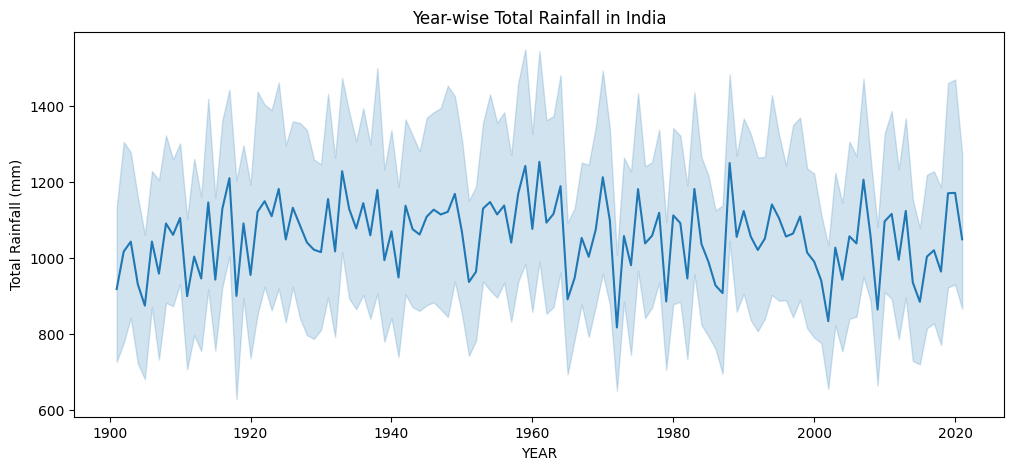

In [47]:
# Year-wise total rainfall trend

plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='YEAR', y='TOTAL')
plt.title('Year-wise Total Rainfall in India')
plt.ylabel('Total Rainfall (mm)')
plt.savefig('Year-Wise_Total_Rainfall.png')
plt.show()

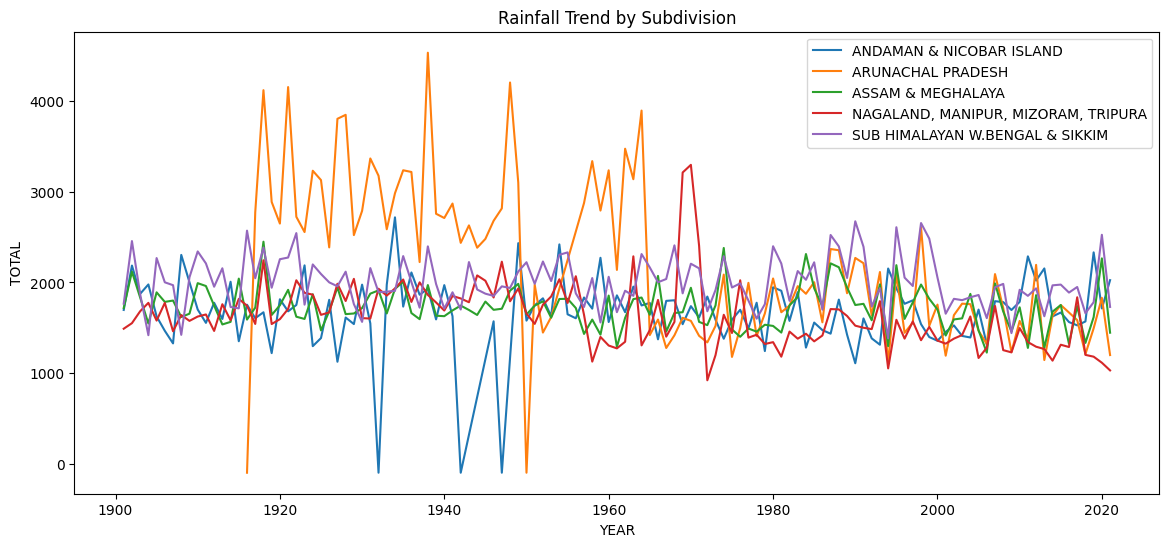

In [48]:
# Subdivision-wise trend

plt.figure(figsize=(14,6))
sample_subdivs = df['subdivision'].unique()[:5]
for subdiv in sample_subdivs:
    sns.lineplot(data=df[df['subdivision'] == subdiv], x='YEAR', y='TOTAL', label=subdiv)

plt.title('Rainfall Trend by Subdivision')
plt.legend()
plt.savefig('Rainfall_Trend_by_Subdivision.png')
plt.show()


## Distribution Analysis

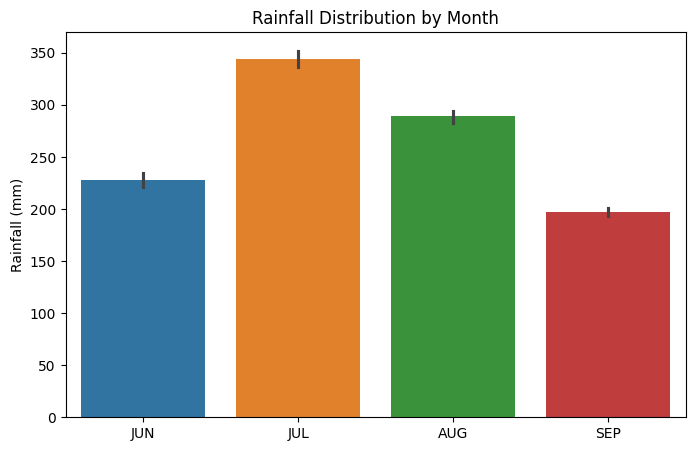

In [51]:
# Boxplot - seasonal rainfall distribution

plt.figure(figsize=(8,5))
sns.barplot(data=df[['JUN', 'JUL', 'AUG', 'SEP']])
plt.title('Rainfall Distribution by Month')
plt.ylabel('Rainfall (mm)')
plt.savefig('Rainfall_Distribution_by_Month.png')
plt.show()

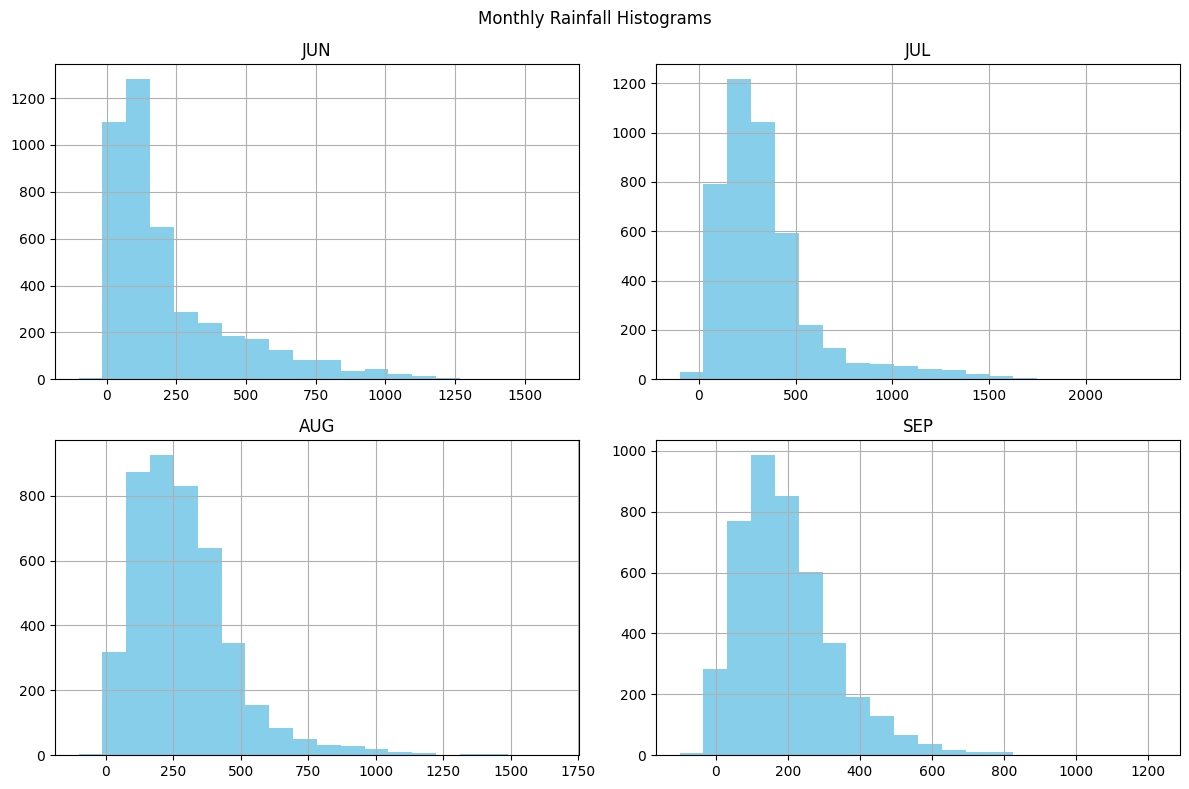

In [49]:
# Histogram - for each month

df[['JUN','JUL','AUG','SEP']].hist(bins=20, figsize=(12,8), color='skyblue')
plt.suptitle('Monthly Rainfall Histograms')
plt.tight_layout()
plt.savefig('Monthly_Rainfall_Histograms.png')
plt.show()

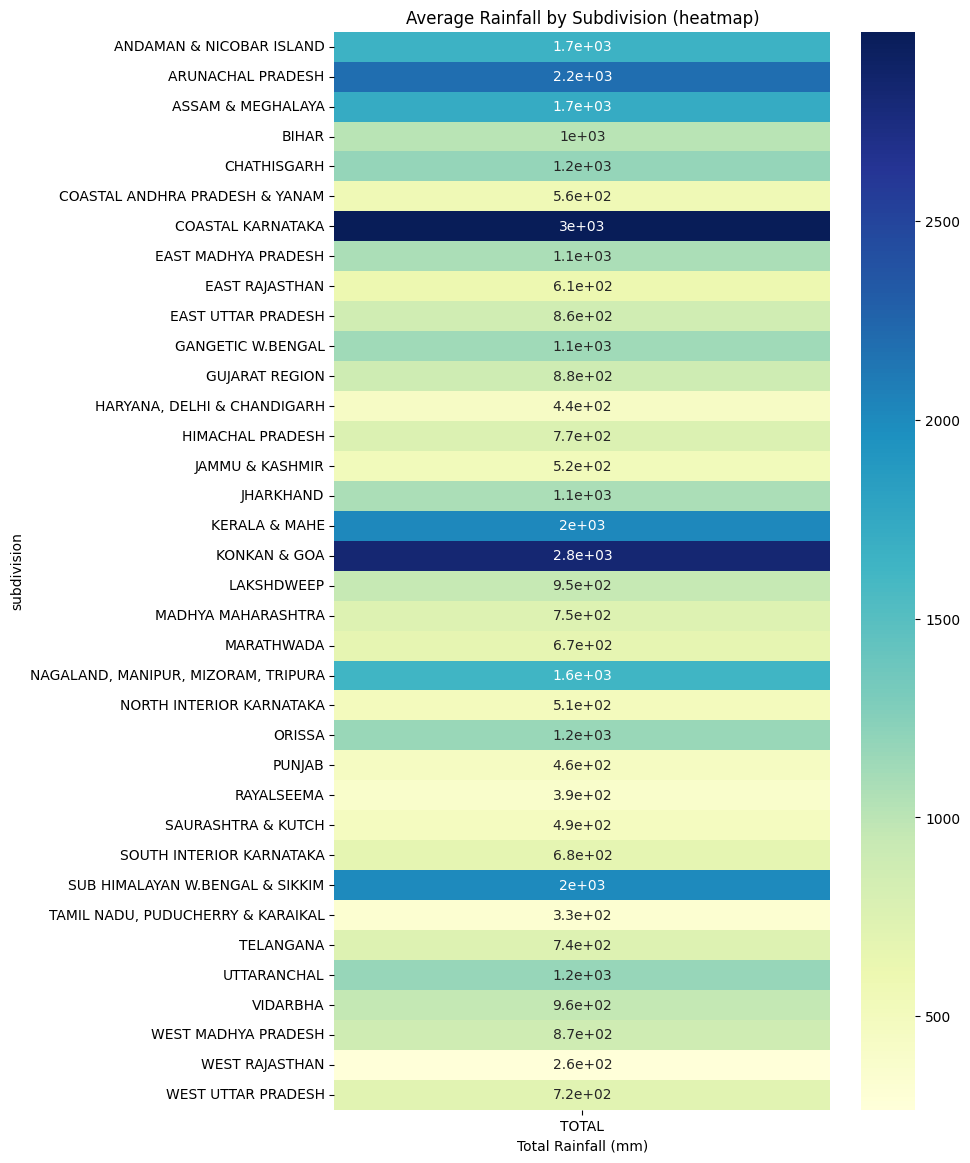

In [19]:
# Geospatial or Regional Patterns - heatmap by subdivision

pivot = df.pivot_table(index='subdivision', values='TOTAL', aggfunc='mean')

plt.figure(figsize=(8,14))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Average Rainfall by Subdivision (heatmap)')
plt.xlabel('Total Rainfall (mm)')
plt.show()

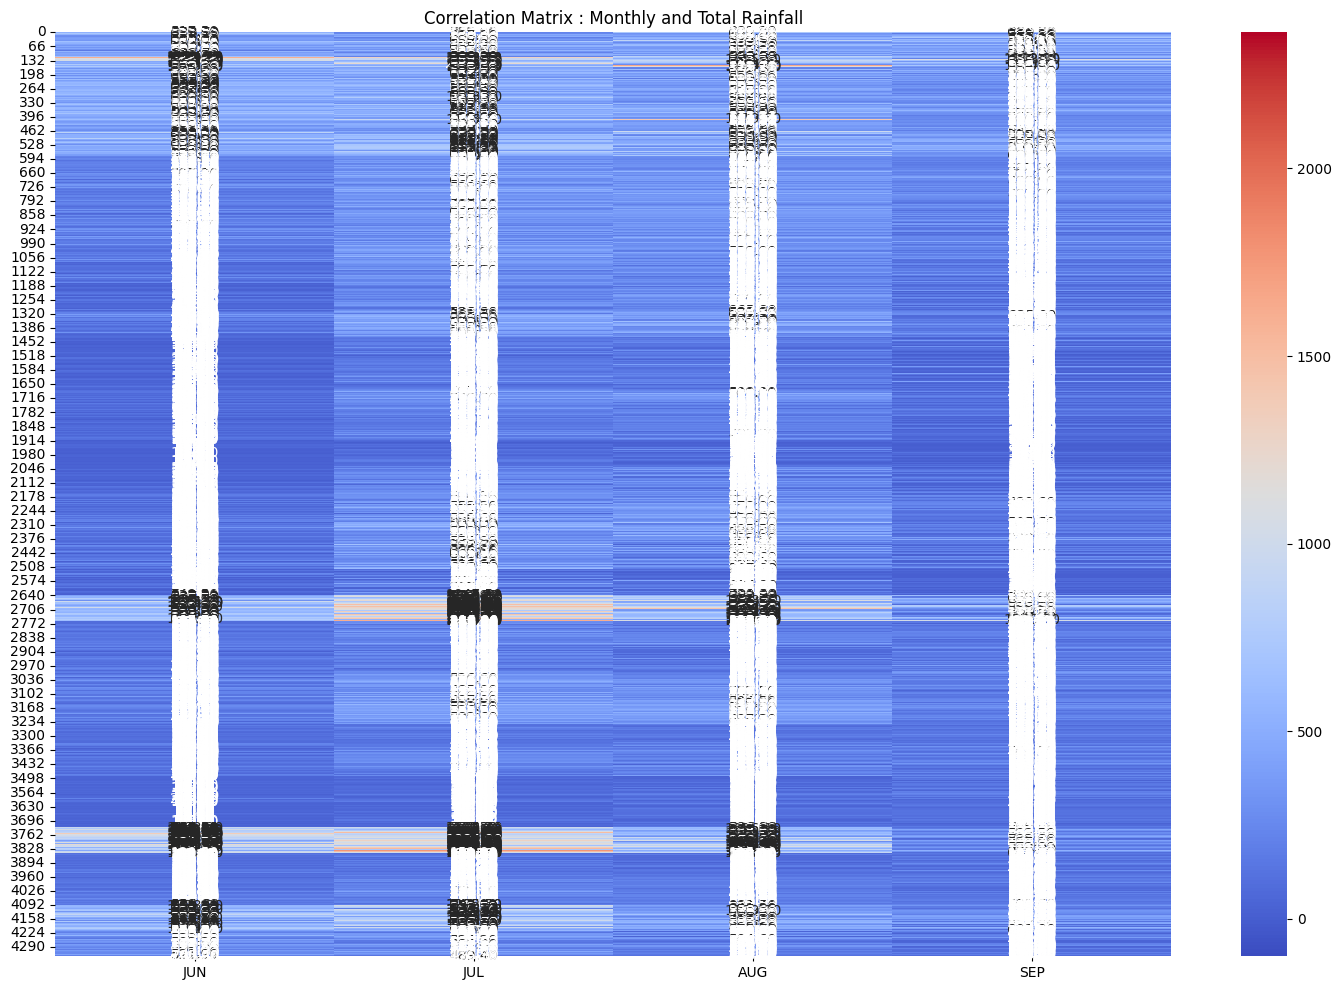

In [20]:
# Correlation Analysis 

corr_matric = df[['JUN','JUL','AUG','SEP']]

plt.figure(figsize=(18,12))
sns.heatmap(corr_matric, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix : Monthly and Total Rainfall')
plt.show()

In [21]:
df.sort_values('YEAR')

,subdivision,YEAR,JUN,JUL,AUG,SEP,TOTAL,AVG_RAINFALL,YOY_CHANGE,PREV_YEAR_RAINFALL
0,ANDAMAN & NICOBAR ISLAND,1901,517.5,365.1,481.1,332.6,1696.3,424.075,NaN,NaN
3728,COASTAL KARNATAKA,1901,960.9,991.2,606.4,108.0,2666.6,666.625,NaN,NaN
3607,"TAMIL NADU, PUDUCHERRY & KARAIKAL",1901,42.1,51.1,69.8,192.1,355.0,88.775,NaN,NaN
3486,RAYALSEEMA,1901,53.7,65.1,50.1,115.1,283.9,71.000,NaN,NaN
3365,TELANGANA,1901,101.1,213.4,201.4,85.4,601.4,150.325,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3485,TELANGANA,2021,195.7,365.7,192.8,290.1,1044.3,261.075,-0.047085,1095.9
581,SUB HIMALAYAN W.BENGAL & SIKKIM,2021,448.0,477.6,576.0,227.8,1729.5,432.350,-0.315185,2525.5
339,ASSAM & MEGHALAYA,2021,477.8,366.0,434.8,166.7,1445.2,361.325,-0.361999,2265.2
1065,BIHAR,2021,349.4,259.2,324.9,115.2,1048.8,262.175,-0.179086,1277.6


# Machine Learning - Rainfall Prediction

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
# sort data by year to preserve time order
df_sorted = df.sort_values('YEAR')

In [24]:
# one-hot encoding (subdivision)
df_encoded = pd.get_dummies(df_sorted, columns=['subdivision'], dtype=int, drop_first=True)

In [25]:
df_encoded

,YEAR,JUN,JUL,AUG,SEP,TOTAL,AVG_RAINFALL,YOY_CHANGE,PREV_YEAR_RAINFALL,subdivision_ARUNACHAL PRADESH,...,subdivision_SAURASHTRA & KUTCH,subdivision_SOUTH INTERIOR KARNATAKA,subdivision_SUB HIMALAYAN W.BENGAL & SIKKIM,"subdivision_TAMIL NADU, PUDUCHERRY & KARAIKAL",subdivision_TELANGANA,subdivision_UTTARANCHAL,subdivision_VIDARBHA,subdivision_WEST MADHYA PRADESH,subdivision_WEST RAJASTHAN,subdivision_WEST UTTAR PRADESH
0,1901,517.5,365.1,481.1,332.6,1696.3,424.075,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3728,1901,960.9,991.2,606.4,108.0,2666.6,666.625,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3607,1901,42.1,51.1,69.8,192.1,355.0,88.775,NaN,NaN,0,...,0,0,0,1,0,0,0,0,0,0
3486,1901,53.7,65.1,50.1,115.1,283.9,71.000,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3365,1901,101.1,213.4,201.4,85.4,601.4,150.325,NaN,NaN,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485,2021,195.7,365.7,192.8,290.1,1044.3,261.075,-0.047085,1095.9,0,...,0,0,0,0,1,0,0,0,0,0
581,2021,448.0,477.6,576.0,227.8,1729.5,432.350,-0.315185,2525.5,0,...,0,0,1,0,0,0,0,0,0,0
339,2021,477.8,366.0,434.8,166.7,1445.2,361.325,-0.361999,2265.2,0,...,0,0,0,0,0,0,0,0,0,0
1065,2021,349.4,259.2,324.9,115.2,1048.8,262.175,-0.179086,1277.6,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# define x & y
features = ['YEAR', 'JUN', 'JUL', 'AUG', 'SEP'] + [col for col in df_encoded.columns if col.startswith('subdivision_')]
target = 'TOTAL'

X = df_encoded[features]
y = df_encoded[target]

In [27]:
# train test split (based on time)
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [28]:
# trainig model

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [29]:
# predict
linear_y_pred = linear.predict(X_test)

In [30]:
# evaluation

linear_rmse = mean_squared_error(y_test, linear_y_pred)
linear_mae = mean_absolute_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)

print(f"RMSE : {linear_rmse:.2f}")
print(f"MAE : {linear_mae:.2f}")
print(f"R2 : {linear_r2:.2f}")

RMSE : 119.62
MAE : 5.61
R2 : 1.00


In [31]:
# random forest
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
forest_y_pred = forest.predict(X_test)

In [33]:
forest_rmse = mean_squared_error(y_test, forest_y_pred)
forest_mae = mean_absolute_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)

print(f"RMSE : {forest_rmse:.2f}")
print(f"MAE : {forest_mae:.2f}")
print(f"R2 : {forest_r2:.2f}")

RMSE : 3560.49
MAE : 30.61
R2 : 0.99


In [34]:
# XGBoost Regressor
from xgboost import XGBRegressor

In [35]:
xg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [36]:
xg_y_pred = xg.predict(X_test)

In [37]:
xg_rmse = mean_squared_error(y_test, xg_y_pred)
xg_mae = mean_absolute_error(y_test, xg_y_pred)
xg_r2 = r2_score(y_test, xg_y_pred)

print(f"RMSE : {xg_rmse:.2f}")
print(f"MAE : {xg_mae:.2f}")
print(f"R2 : {xg_r2:.2f}")

RMSE : 2784.11
MAE : 28.21
R2 : 0.99


In [38]:
df_encoded.head(10)

,YEAR,JUN,JUL,AUG,SEP,TOTAL,AVG_RAINFALL,YOY_CHANGE,PREV_YEAR_RAINFALL,subdivision_ARUNACHAL PRADESH,...,subdivision_SAURASHTRA & KUTCH,subdivision_SOUTH INTERIOR KARNATAKA,subdivision_SUB HIMALAYAN W.BENGAL & SIKKIM,"subdivision_TAMIL NADU, PUDUCHERRY & KARAIKAL",subdivision_TELANGANA,subdivision_UTTARANCHAL,subdivision_VIDARBHA,subdivision_WEST MADHYA PRADESH,subdivision_WEST RAJASTHAN,subdivision_WEST UTTAR PRADESH
0,1901,517.5,365.1,481.1,332.6,1696.3,424.075,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3728,1901,960.9,991.2,606.4,108.0,2666.6,666.625,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3607,1901,42.1,51.1,69.8,192.1,355.0,88.775,NaN,NaN,0,...,0,0,0,1,0,0,0,0,0,0
3486,1901,53.7,65.1,50.1,115.1,283.9,71.000,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3365,1901,101.1,213.4,201.4,85.4,601.4,150.325,NaN,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3244,1901,64.8,107.2,118.7,113.7,404.4,101.100,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3123,1901,129.9,346.5,358.7,214.1,1049.2,262.300,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3002,1901,129.7,295.3,368.8,123.4,917.1,229.300,NaN,NaN,0,...,0,0,0,0,0,0,1,0,0,0
2881,1901,193.1,184.1,249.8,74.0,700.9,175.250,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2760,1901,107.7,215.9,194.1,83.7,601.4,150.350,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_encoded.tail()

,YEAR,JUN,JUL,AUG,SEP,TOTAL,AVG_RAINFALL,YOY_CHANGE,PREV_YEAR_RAINFALL,subdivision_ARUNACHAL PRADESH,...,subdivision_SAURASHTRA & KUTCH,subdivision_SOUTH INTERIOR KARNATAKA,subdivision_SUB HIMALAYAN W.BENGAL & SIKKIM,"subdivision_TAMIL NADU, PUDUCHERRY & KARAIKAL",subdivision_TELANGANA,subdivision_UTTARANCHAL,subdivision_VIDARBHA,subdivision_WEST MADHYA PRADESH,subdivision_WEST RAJASTHAN,subdivision_WEST UTTAR PRADESH
3485,2021,195.7,365.7,192.8,290.1,1044.3,261.075,-0.047085,1095.9,0,...,0,0,0,0,1,0,0,0,0,0
581,2021,448.0,477.6,576.0,227.8,1729.5,432.350,-0.315185,2525.5,0,...,0,0,1,0,0,0,0,0,0,0
339,2021,477.8,366.0,434.8,166.7,1445.2,361.325,-0.361999,2265.2,0,...,0,0,0,0,0,0,0,0,0,0
1065,2021,349.4,259.2,324.9,115.2,1048.8,262.175,-0.179086,1277.6,0,...,0,0,0,0,0,0,0,0,0,0
4331,2021,160.0,156.5,319.5,154.9,790.9,197.725,-0.412189,1345.5,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df_encoded['YEAR'].value_counts()

YEAR
1961    36
1962    36
1990    36
1989    36
1988    36
        ..
1954    35
1955    35
1956    35
1901    35
1909    34
Name: count, Length: 121, dtype: int64

In [41]:
df_encoded['YEAR'].value_counts().get(1901, 0)

35

In [42]:
pd.set_option("display.max_columns", None)
df_encoded.head(5)

,YEAR,JUN,JUL,AUG,SEP,TOTAL,AVG_RAINFALL,YOY_CHANGE,PREV_YEAR_RAINFALL,subdivision_ARUNACHAL PRADESH,subdivision_ASSAM & MEGHALAYA,subdivision_BIHAR,subdivision_CHATHISGARH,subdivision_COASTAL ANDHRA PRADESH & YANAM,subdivision_COASTAL KARNATAKA,subdivision_EAST MADHYA PRADESH,subdivision_EAST RAJASTHAN,subdivision_EAST UTTAR PRADESH,subdivision_GANGETIC W.BENGAL,subdivision_GUJARAT REGION,"subdivision_HARYANA, DELHI & CHANDIGARH",subdivision_HIMACHAL PRADESH,subdivision_JAMMU & KASHMIR,subdivision_JHARKHAND,subdivision_KERALA & MAHE,subdivision_KONKAN & GOA,subdivision_LAKSHDWEEP,subdivision_MADHYA MAHARASHTRA,subdivision_MARATHWADA,"subdivision_NAGALAND, MANIPUR, MIZORAM, TRIPURA",subdivision_NORTH INTERIOR KARNATAKA,subdivision_ORISSA,subdivision_PUNJAB,subdivision_RAYALSEEMA,subdivision_SAURASHTRA & KUTCH,subdivision_SOUTH INTERIOR KARNATAKA,subdivision_SUB HIMALAYAN W.BENGAL & SIKKIM,"subdivision_TAMIL NADU, PUDUCHERRY & KARAIKAL",subdivision_TELANGANA,subdivision_UTTARANCHAL,subdivision_VIDARBHA,subdivision_WEST MADHYA PRADESH,subdivision_WEST RAJASTHAN,subdivision_WEST UTTAR PRADESH
0,1901,517.5,365.1,481.1,332.6,1696.3,424.075,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3728,1901,960.9,991.2,606.4,108.0,2666.6,666.625,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607,1901,42.1,51.1,69.8,192.1,355.0,88.775,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3486,1901,53.7,65.1,50.1,115.1,283.9,71.000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3365,1901,101.1,213.4,201.4,85.4,601.4,150.325,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
